In [1]:
# imports and helper functions

from ipywidgets import interact
from fastai.basics import *
import torch
import torch.nn.functional as F

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In this notebook we're going to to build a shallow neural network whose hidden layer consists of three ReLU functions.  Here is a diagram of the network:

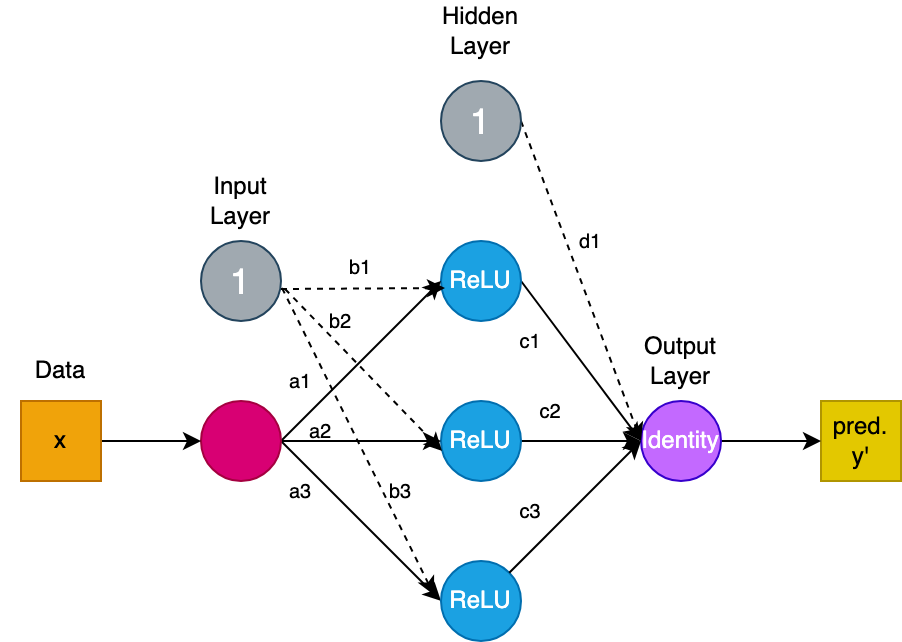

We're going to use our shallow network to fit the wiggly data below just to see how all the pieces fit together.  We'll use mean squared error as the loss function and gradient descent as the optimizer.

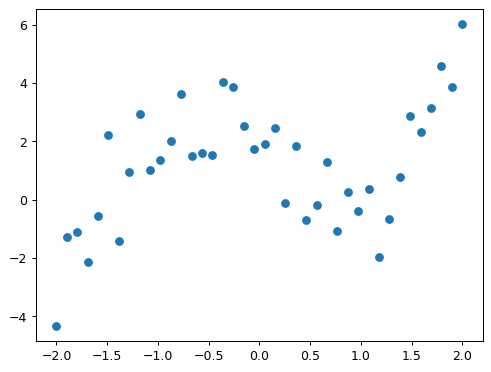

In [7]:
np.random.seed(123)

x = torch.linspace(-2, 2, steps=40)[:,None]
y = .25*(4*x**3-7*x+5) + np.random.normal(scale = 1, size = x.shape)
plt.scatter(x,y)

Start by defining a `three_relu` function which takes the ten parameters as input and returns the weighted sum of the three ReLU activation function (with bias).  This function is analagous to the `linear` function we made last time.

In [ ]:
def three_relu(a1, a2, a3, b1, b2, b3, c1, c2, c3, d1, x):

Now define a `mk_three_relu` function, analagous to `mk_linear` that takes the 10 parameters as input and returns a function of `x` that can be plotted.

In [ ]:
def mk_three_relu( )

Try plotting your function for some random choices of parameters.  Instead of typing out the parameters we can generate some random numbers and pass them to our function like this:

In [ ]:
param = torch.randn(10)
f = mk_three_relu( *param )
plot_function(f)

We'll use MSE as our loss function:

In [ ]:
def mse(preds, acts): return torch.mean((preds-acts)**2)

Now lets build a helper function to plot the data, our three_ReLU function, and display the MSE.  Here is our `plot_linear` function from last time to get us started.  Your new function should be called `plot_three_ReLU`.

In [ ]:
def plot_linear(a = 1, b = 20):
    f = mk_linear(a,b)
    plt.scatter(x,y)
    loss = mse( f(x), y )
    plot_function(f, ylim=(17,30), title = f'MSE: {loss:.2f}')
    plt.show()

Now test your function for some random coefficients:

Before we can do gradient descent we need to set up a version of our loss function that takes as input the model parameters and returns the MSE, this will be similar to the `linear_mse` function from last time.  Here is `linear_mse` to use as a template:

In [ ]:
def linear_mse(params):
    f = mk_linear(*params)
    return mse(f(x), y)

Finally now let's use gradient descent to fit our model to the data.  Here's our gradient descent code from last time except that we've modified it to start from a reproducible random set of parameters and added a variable for the learning rate to make it easier to adjust.  Use this as your template to fit the three_ReLU model.  You can change the output to only print the step and the value of the loss function.  You may need to experiment with the learning rate and the number of steps:

In [ ]:
learn_rate = 0.2
num_steps = 10

torch.manual_seed(42)

ab = torch.randn(2)
ab.requires_grad_()

for i in range(num_steps):
    # compute the loss
    loss = linear_mse(ab)

    # compute the gradient of the loss
    loss.backward()

    # take a gradient descent step
    with torch.no_grad(): ab -= ab.grad * learn_rate

    # the next lines are just for getting the values to easily display
    a = ab[0].item()
    b = ab[1].item()
    dmda = ab.grad[0].item()
    dmdb = ab.grad[1].item()
    print(f'step={i}, loss={loss:.2f}, ab = [{a:.2f}, {b:.2f}], grad = [{dmda:.2f},{dmdb:.2f}]')

    # reset the gradient to zero
    ab.grad.data.zero_() # zero gradients after each iteration

Finally, take your fitted model and visualize the result with your `plot_three_ReLU` function:

# Congratulations, you've just built and trained a shallow neural network!